In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("/content/team_performance_dataset_2008to2024.csv")
df.head()

,Match_ID,Date,Teams,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Type,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Umpire,Umpire1,Umpire2,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores
0,335982,2008-04-18,Royal Challengers Bangalore vs Kolkata Knight ...,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,222,82.0,BB McCullum,Asad Rauf,RE Koertzen,J Srinath,61,97,64
1,335983,2008-04-19,Kings XI Punjab vs Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,240,207.0,MEK Hussey,MR Benson,SL Shastri,S Venkataraghavan,53,116,71
2,335984,2008-04-19,Delhi Daredevils vs Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,129,132.0,MF Maharoof,Aleem Dar,GA Pratapkumar,GR Viswanath,40,66,23
3,335985,2008-04-20,Mumbai Indians vs Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,165,166.0,MV Boucher,SJ Davis,DJ Harper,J Srinath,47,71,47
4,335986,2008-04-20,Kolkata Knight Riders vs Deccan Chargers,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,110,112.0,DJ Hussey,BF Bowden,K Hariharan,FM Engineer,39,43,28


In [34]:

def split_teams(match_string):
  """Splits a match string into two team names."""
  try:
    teams = match_string.split(' vs ')
    team1 = teams[0].strip()
    team2 = teams[1].strip()
    return team1, team2
  except:
    return None, None

df[['Team1', 'Team2']] = df['Teams'].apply(lambda x: pd.Series(split_teams(x)))

In [36]:
df.columns

Index(['Match_ID', 'Date', 'Teams', 'Venue', 'Toss_Winner', 'Toss_Decision',
       'Match_Winner', 'Win_Type', 'Win_Margin', 'First_Innings_Score',
       'Second_Innings_Score', 'Player_of_Match', 'Umpire', 'Umpire1',
       'Umpire2', 'Powerplay_Scores', 'Middle_Overs_Scores',
       'Death_Overs_Scores', 'Team1', 'Team2'],
      dtype='object')

In [37]:
df.drop(columns=['Teams','Win_Type','Umpire', 'Umpire1','Umpire2'], inplace=True)

In [38]:
df

,Match_ID,Date,Venue,Toss_Winner,Toss_Decision,Match_Winner,Win_Margin,First_Innings_Score,Second_Innings_Score,Player_of_Match,Powerplay_Scores,Middle_Overs_Scores,Death_Overs_Scores,Team1,Team2
0,335982,2008-04-18,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,140.0,222,82.0,BB McCullum,61,97,64,Royal Challengers Bangalore,Kolkata Knight Riders
1,335983,2008-04-19,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,Chennai Super Kings,33.0,240,207.0,MEK Hussey,53,116,71,Kings XI Punjab,Chennai Super Kings
2,335984,2008-04-19,Feroz Shah Kotla,Rajasthan Royals,bat,Delhi Daredevils,9.0,129,132.0,MF Maharoof,40,66,23,Delhi Daredevils,Rajasthan Royals
3,335985,2008-04-20,Wankhede Stadium,Mumbai Indians,bat,Royal Challengers Bangalore,5.0,165,166.0,MV Boucher,47,71,47,Mumbai Indians,Royal Challengers Bangalore
4,335986,2008-04-20,Eden Gardens,Deccan Chargers,bat,Kolkata Knight Riders,5.0,110,112.0,DJ Hussey,39,43,28,Kolkata Knight Riders,Deccan Chargers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1426283,2024-04-28,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,field,Royal Challengers Bengaluru,9.0,200,206.0,WG Jacks,42,106,52,Gujarat Titans,Royal Challengers Bengaluru
1069,1426284,2024-04-28,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,field,Chennai Super Kings,78.0,212,134.0,RD Gaikwad,50,109,53,Chennai Super Kings,Sunrisers Hyderabad
1070,1426285,2024-04-29,"Eden Gardens, Kolkata",Delhi Capitals,bat,Kolkata Knight Riders,7.0,153,157.0,CV Varun,67,61,25,Delhi Capitals,Kolkata Knight Riders
1071,1426286,2024-04-30,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,field,Lucknow Super Giants,4.0,144,145.0,MP Stoinis,28,78,38,Mumbai Indians,Lucknow Super Giants


In [42]:
df.isna().sum()

,0
Match_ID,0
Date,0
Venue,0
Toss_Winner,0
Toss_Decision,0
Match_Winner,0
Win_Margin,0
First_Innings_Score,0
Second_Innings_Score,0
Player_of_Match,0


In [40]:
df['Win_Margin'] = df['Win_Margin'].fillna(0)

In [41]:
df['Player_of_Match'] = df['Player_of_Match'].fillna('Unknown')
df['Second_Innings_Score'] = df['Second_Innings_Score'].fillna(df['Second_Innings_Score'].median())

<ipython-input-46-0fe43b9837b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Match_Winner', palette='viridis')


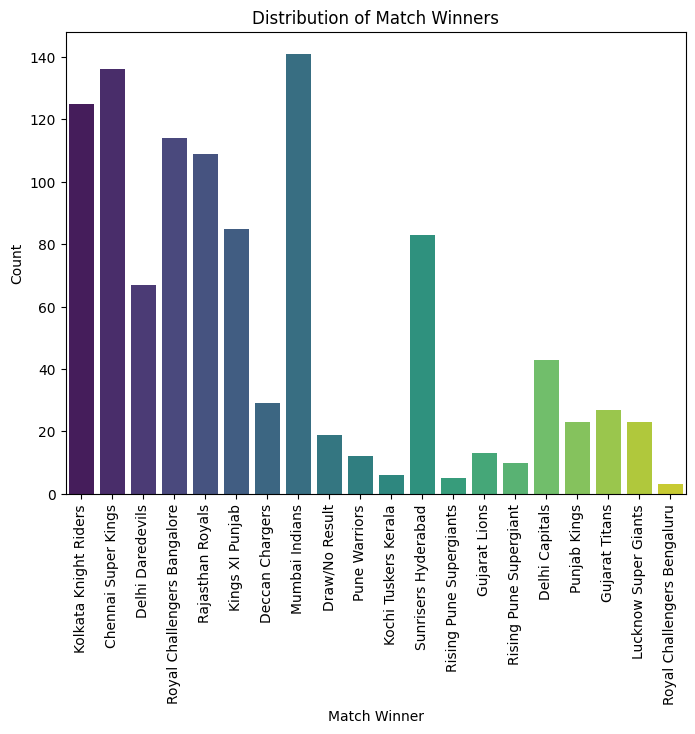

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Match_Winner', palette='viridis')
plt.title('Distribution of Match Winners')
plt.xlabel('Match Winner')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

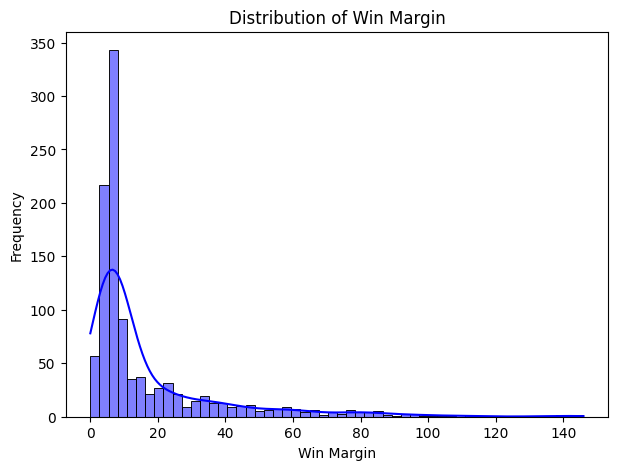

In [58]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Win_Margin'].dropna(), kde=True, color='blue')  # dropna() to avoid missing values
plt.title('Distribution of Win Margin')
plt.xlabel('Win Margin')
plt.ylabel('Frequency')
plt.show()

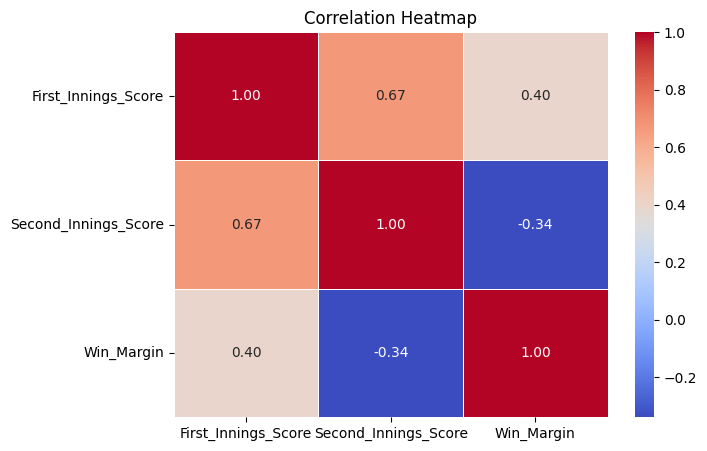

In [59]:
corr_matrix = df[['First_Innings_Score', 'Second_Innings_Score', 'Win_Margin']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

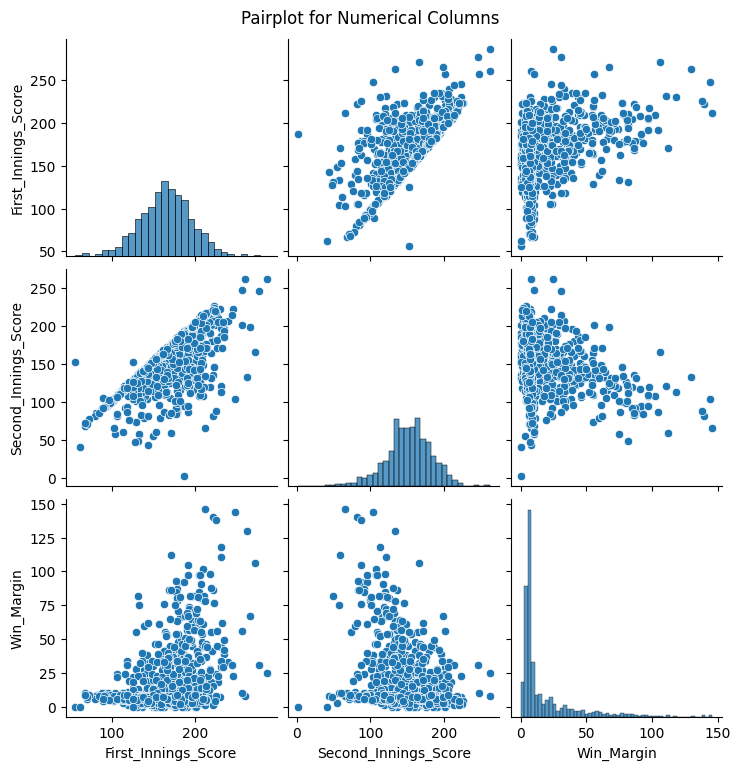

In [56]:
sns.pairplot(df[['First_Innings_Score', 'Second_Innings_Score', 'Win_Margin']])
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()

In [60]:
df.to_csv("ipl_win.csv", index=False)